Rainfall surplus data preview:
                ST_NM  Rainfall_Surplus  Unnamed: 2
0     Andhra Pradesh         26.260424         NaN
1          Telangana         22.214201         NaN
2            Gujarat         28.582172         NaN
3          Karnataka         21.873205         NaN
4     Madhya Pradesh         26.690792         NaN
5        Maharashtra         22.304513         NaN
6             Odisha         14.648043         NaN
7             Punjab         15.008200         NaN
8          Rajasthan         21.636839         NaN
9         Tamil Nadu         25.663229         NaN
10       West Bengal         13.995835         NaN
11     Uttar Pradesh         17.387715         NaN
12      Chhattisgarh         13.984264         NaN
13  Himachal Pradesh         14.709350         NaN
14         Jharkhand         13.606371         NaN
15       Uttarakhand         27.327683         NaN
16            Kerala         15.289017         NaN
17           Tripura         27.676595         NaN

C:\Users\IEG\AppData\Local\Temp\ipykernel_11800\601832780.py:54: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged[STATE_COLUMN]):


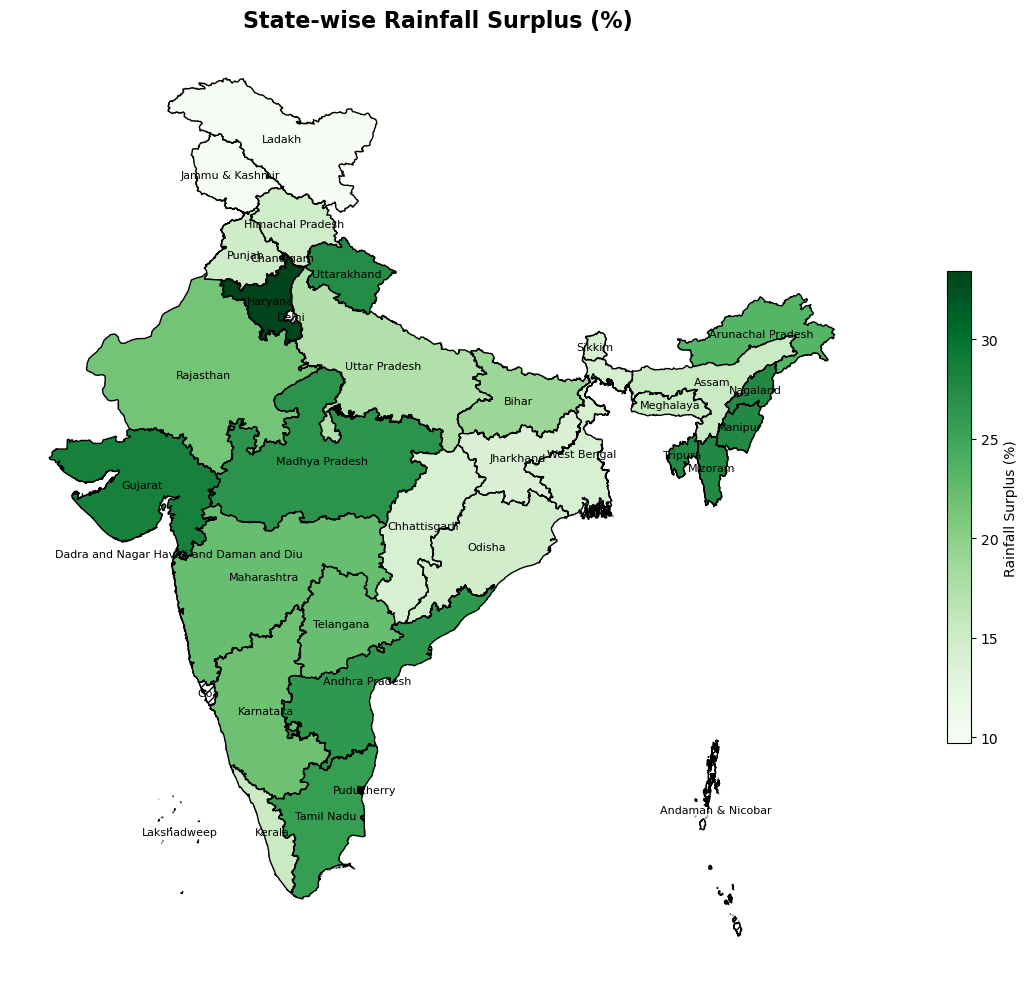

In [1]:
#!pip install fiona shapely pyproj rtree
#!pip install geopandas matplotlib pandas
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Path to the shapefile
shapefile_path = r"C:\Users\IEG\Desktop\state_map\Admin2.shp"

# Load the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Load the reservoir volume data from the CSV file
csv_path = "Rainfall_Surplus.csv"
rainfall_surplus = pd.read_csv(csv_path)

# Print the first few rows to inspect the data
print("Rainfall surplus data preview:\n", rainfall_surplus.head(18))

# Assuming 'State' column in CSV matches 'ST_NM' in shapefile, and 'Rainfall' 
STATE_COLUMN = 'ST_NM'  # State names in the shapefile
CSV_STATE_COLUMN = 'ST_NM'  # State column in CSV (adjust if necessary)
METRE_COLUMN = 'Rainfall_Surplus'    # Volume column in CSV (adjust if necessary)

# Merge the shapefile data with the reservoir data based on state names
gdf_merged = gdf.merge(rainfall_surplus, how='left', left_on=STATE_COLUMN, right_on=CSV_STATE_COLUMN)

# Plot the map with reservoir volumes, ensuring that missing data shows as blank or NaN
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a choropleth map for reservoir volumes
gdf_merged.plot(
    ax=ax,
    column=METRE_COLUMN,  # Use reservoir volume for color
    cmap='Greens',        # Reversed blue color map, lightest for highest values
    legend=True,
    edgecolor='black',
    missing_kwds={         # Define how missing data will be displayed
        "color": "white",   # States with no data will be pure white
        "hatch": "///",     # Dot-dot pattern for unavailable data
        "label": "No Data"  # Label for the missing data in the legend
    },
    legend_kwds={
        'label': "Rainfall Surplus (%)",
        'orientation': "vertical",
        'shrink': 0.5
    }
)

# Add a title to the map
ax.set_title("State-wise Rainfall Surplus (%) ", fontsize=16, fontweight='bold')

# Annotate each state with its name inside the map, no bold for state names
for x, y, label in zip(gdf_merged.geometry.centroid.x, gdf_merged.geometry.centroid.y, gdf_merged[STATE_COLUMN]):
    ax.text(x, y, label, fontsize=8, ha='center', va='center', color='black')

# Remove the axis for a cleaner map
ax.set_axis_off()

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the map
plt.show()
